<a href="https://colab.research.google.com/github/rojan-herald/concepts_and_technologies_of_ai/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1. Load dataset
bank = pd.read_csv("/content/drive/MyDrive/Concepts and technologies of AI/bank.csv")

# 2a. Columns with dtype = object
object_cols = bank.select_dtypes(include='object')
print("Object columns:\n", object_cols.columns)

# 2b. Unique values of object columns
for col in object_cols:
    print(f"\nUnique values in {col}:")
    print(bank[col].unique())

# 2c. Null values count
print("\nNull values per column:")
print(bank.isnull().sum())

# 3. Drop object columns, save to new CSV
bank_numeric = bank.drop(columns=object_cols.columns)
bank_numeric.to_csv("/content/drive/MyDrive/Concepts and technologies of AI/bank.csv", index=False)

# 4. Read numeric CSV and show summary statistics
bank_numeric_loaded = pd.read_csv("/content/drive/MyDrive/Concepts and technologies of AI/bank.csv")
print("\nSummary statistics:")
bank_numeric_loaded.describe()

Object columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values in job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital:
['married' 'single' 'divorced']

Unique values in education:
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default:
['no' 'yes']

Unique values in housing:
['yes' 'no']

Unique values in loan:
['no' 'yes']

Unique values in contact:
['unknown' 'cellular' 'telephone']

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome:
['unknown' 'failure' 'other' 'success']

Unique values in y:
['no' 'yes']

Null values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
da

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
import pandas as pd

# 1. Load dataset
medical = pd.read_csv("/content/drive/MyDrive/Concepts and technologies of AI/medical_students_dataset.csv")

# 2. Identify missing values
print("Missing values:\n", medical.isnull().sum())

# 3. Fill missing values
for col in medical.columns:
    if medical[col].isnull().sum() > 0:
        if medical[col].dtype == 'object':
            # Fill categorical with mode
            medical[col] = medical[col].fillna(medical[col].mode()[0])
            print(f"Filled missing categorical values in {col} using MODE")
        else:
            # Fill numeric with median
            medical[col] = medical[col].fillna(medical[col].median())
            print(f"Filled missing numeric values in {col} using MEDIAN")

# 4. Remove duplicates
duplicate_count = medical.duplicated().sum()
print("\nTotal duplicate rows =", duplicate_count)

medical = medical.drop_duplicates()


Missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled missing numeric values in Student ID using MEDIAN
Filled missing numeric values in Age using MEDIAN
Filled missing categorical values in Gender using MODE
Filled missing numeric values in Height using MEDIAN
Filled missing numeric values in Weight using MEDIAN
Filled missing categorical values in Blood Type using MODE
Filled missing numeric values in BMI using MEDIAN
Filled missing numeric values in Temperature using MEDIAN
Filled missing numeric values in Heart Rate using MEDIAN
Filled missing numeric values in Blood Pressure using MEDIAN
Filled missing numeric values in Cholesterol using MEDIAN
Filled missing categorical values in Diabetes u

In [ ]:
import pandas as pd

titanic = pd.read_csv("/content/drive/MyDrive/Concepts and technologies of AI/Titanic-Dataset.csv")

subset = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]
subset_first_class = subset[subset['Pclass'] == 1]

mean_fare = subset_first_class['Fare'].mean()
median_fare = subset_first_class['Fare'].median()
max_fare = subset_first_class['Fare'].max()
min_fare = subset_first_class['Fare'].min()

mean_fare, median_fare, max_fare, min_fare


(np.float64(84.1546875), 60.287499999999994, 512.3292, 0.0)

In [ ]:
null_age = subset_first_class['Age'].isnull().sum()
print("Null Age values:", null_age)

subset_first_class = subset_first_class.dropna(subset=['Age'])


Null Age values: 30


In [ ]:
encoded = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

titanic_encoded = pd.concat([titanic, encoded], axis=1)

titanic_encoded = titanic_encoded.drop(columns=['Embarked'])

titanic_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


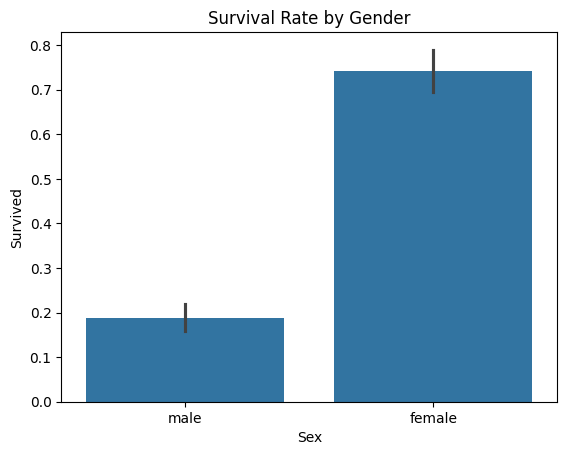

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

survival_by_sex = titanic.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()


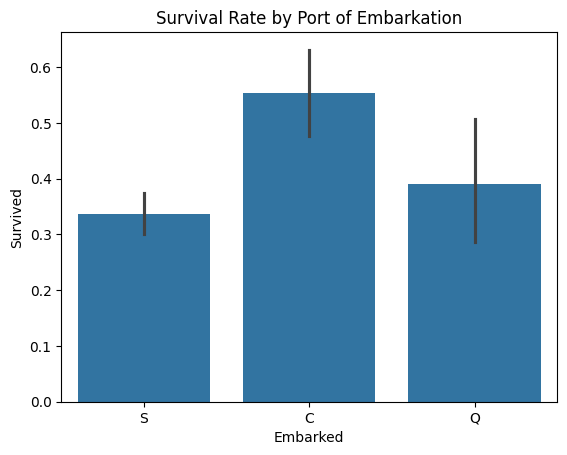

In [ ]:
sns.barplot(data=titanic, x='Embarked', y='Survived')
plt.title("Survival Rate by Port of Embarkation")
plt.show()


/tmp/ipython-input-2568515313.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


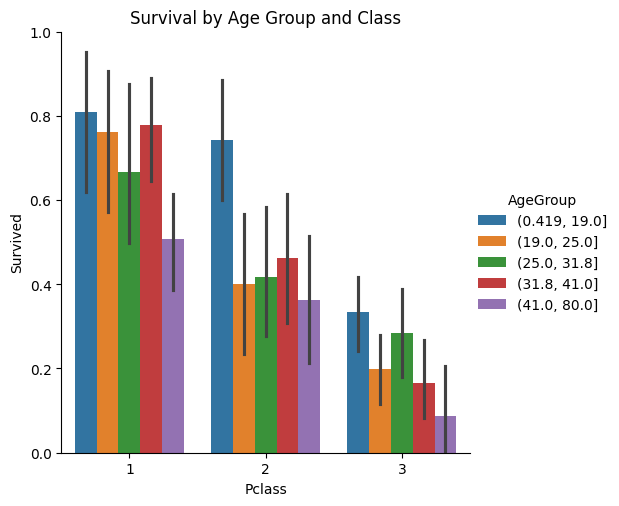

In [ ]:
titanic['AgeGroup'] = pd.qcut(titanic['Age'], 5)

grouped = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print(grouped)

sns.catplot(data=titanic, x='Pclass', y='Survived', hue='AgeGroup', kind='bar')
plt.title("Survival by Age Group and Class")
plt.show()
